In [26]:
import run_one_config as roc
import postpro as pp

# reload roc
import importlib
importlib.reload(roc)

res = roc.__main__()


In [22]:
posArr = res['posArr']
print(posArr.shape)
res['zsArr']


(2, 100, 400)


array([[0.57089297, 0.5718574 , 0.57060507, ..., 0.55646789, 0.55330579,
        0.55466033],
       [0.14800008, 0.15102167, 0.1497736 , ..., 0.1500574 , 0.15134463,
        0.15245962],
       [0.844311  , 0.8461389 , 0.84754231, ..., 0.83777961, 0.83843417,
        0.83767924],
       ...,
       [0.68743047, 0.68489183, 0.68508417, ..., 0.62451998, 0.62447105,
        0.62301318],
       [1.36784056, 1.36670966, 1.36402568, ..., 1.35519617, 1.35321755,
        1.35473475],
       [0.58295736, 0.5828308 , 0.58471569, ..., 0.53168129, 0.53390758,
        0.53426887]])

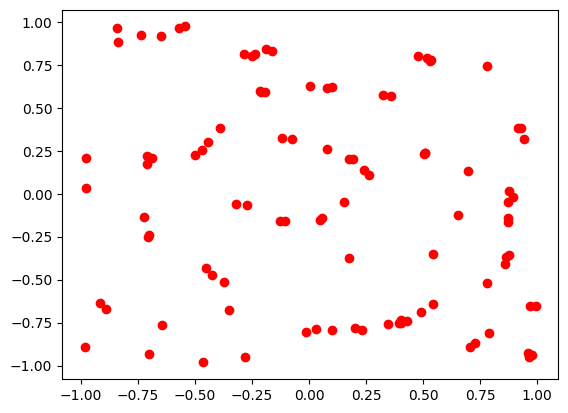

In [25]:
# plot the final positions
import matplotlib.pyplot as plt
plt.plot(posArr[0,:,-1], posArr[1,:,-1], 'ro')

(100,)
(100, 400)
399


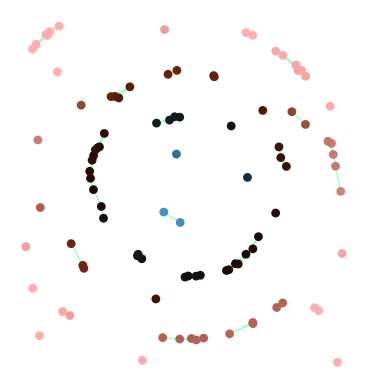

In [70]:
posArr = res['posArr']
opinionArr = res['zsArr']
stateArr = res['stArr']

pos = posArr[:,:,-1]
opinion = opinionArr[:,-1]
state = stateArr[:,-1]

print(opinion.shape)

importlib.reload(pp)

# CMap = plt.cm.get_cmap('coolwarm')

# from palettable.lightbartlein.diverging import BlueDarkRed18_2
# CMap = BlueDarkRed18_2.mpl_colormap

from palettable.scientific.diverging import Berlin_20
CMap = Berlin_20.mpl_colormap

# from palettable.mycarta import Cube1_3
# CMap = Cube1_3.mpl_colormap

NPop = 100
linkThresh = 0.15

# pp.plot_pos_net(pos=pos, opinion=opinion, state=state, CMap=CMap, NPop=NPop, linkThresh=linkThresh, show_net_bool=True, marker_size=40, bool_from_arr=False)

print(opinionArr.shape)
length_of_sim = opinionArr.shape[1] - 1
print(length_of_sim)
pp.plot_pos_net(pos=posArr, opinion=opinionArr, state=stateArr, time=length_of_sim, CMap=CMap, NPop=NPop, linkThresh=linkThresh, show_net_bool=True, marker_size=40, bool_from_arr=True)

In [1]:
# show matplotlib in a external window with qt5
%matplotlib qt5
# reload pp everytime automatically
importlib.reload(pp)

pp.show_animation(result=res)


NameError: name 'importlib' is not defined

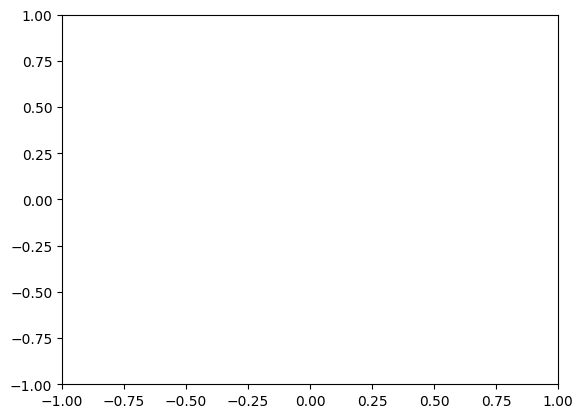

In [61]:
# make a movie animation using the plot_pos_net function

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and a set of subplots
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Create a FuncAnimation object
anim = FuncAnimation(fig, pp.plot_pos_net, frames=range(0, posArr.shape[2], 1), fargs=(posArr, opinionArr, stateArr, CMap, NPop, linkThresh, False, 40, True))

# Show the animation
plt.show()




In [62]:
# Save the animation
anim.save('animation.gif', writer='imagemagick', fps=10)

# Save the animation
anim.save('animation.mp4', writer='ffmpeg', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range